# Task 3: To Explore Unsupervised Machine Learning

In [198]:
#Importing all the libraries and modules needed to complete this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
%matplotlib inline

In [199]:
# Loading the iris dataset
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=data.feature_names)
# displaying the first 10 rows of the dataframe
df.head(10) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [200]:
# displaying 10 random rows of the dataframe
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,4.6,3.1,1.5,0.2
8,4.4,2.9,1.4,0.2
149,5.9,3.0,5.1,1.8
9,4.9,3.1,1.5,0.1
15,5.7,4.4,1.5,0.4
50,7.0,3.2,4.7,1.4
118,7.7,2.6,6.9,2.3
138,6.0,3.0,4.8,1.8
91,6.1,3.0,4.6,1.4
40,5.0,3.5,1.3,0.3


In [201]:
# displaying number of rows and columns
df.shape
#RESULT: we see that there are 150 rows and 4 columns

(150, 4)

In [202]:
# displaying the names of the columns
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [203]:
#basic statistics of the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [204]:
#checking missing values in the dataframe
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [205]:
# displaying number of missing values per column
df.isnull().sum()
#RESULT: we see that there are no missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

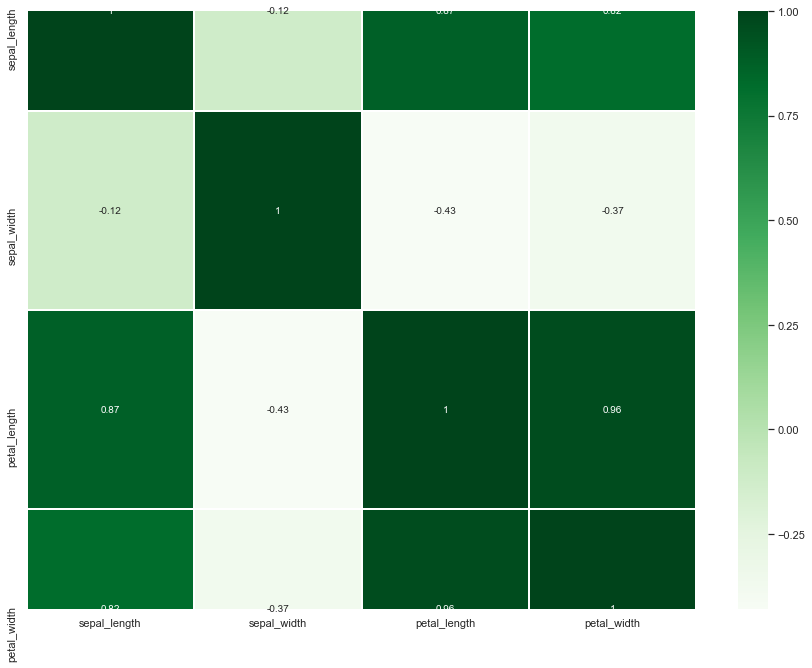

In [206]:
# heatmap to visualize correlation between all numerical values in the dataset
iris = sns.load_dataset("iris") 
fig = plt.figure(figsize=(15,11))
sns.heatmap(iris.corr(),cmap = "Greens", linecolor = 'white', linewidths = 1, annot = True )
#RESULT: unfortunately, the top and bottom of the heatmap has been cut off !

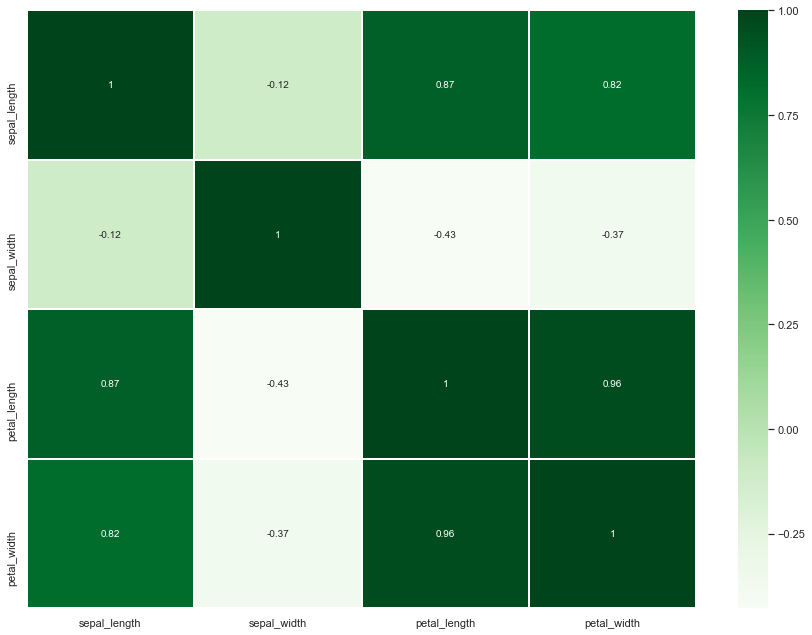

In [207]:
# heatmap to visualize correlation between all numerical values in the dataset
iris = sns.load_dataset("iris") 
fig = plt.figure(figsize=(15,11))
sns.heatmap(iris.corr(),cmap = "Greens", linecolor = 'white', linewidths = 1, annot = True )
# code to fix the bug that cuts off top and bottom of seaborn heatmap
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [208]:
# determining pairwise correlation of all the columns
df.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


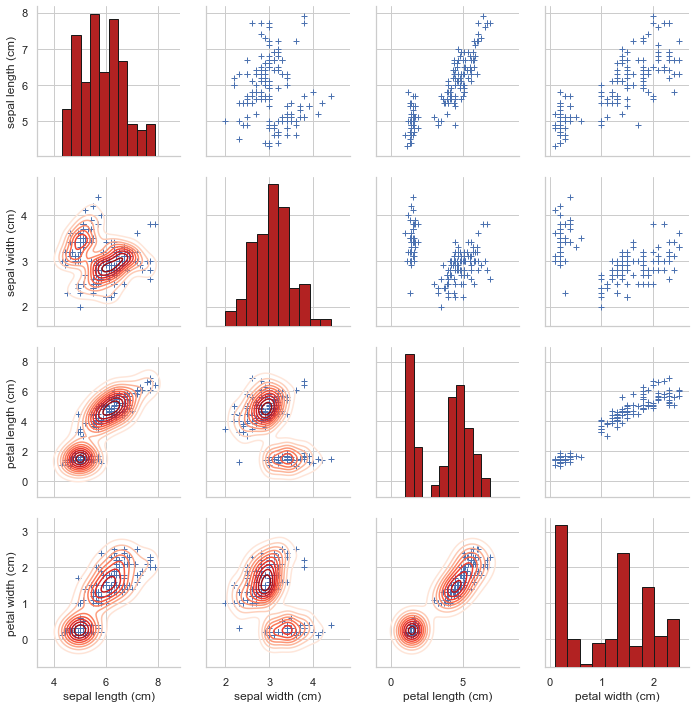

In [209]:
# visualizing relationship between each type of column variable
g=sns.pairplot(df,plot_kws=dict(marker="+", linewidth=1),diag_kws=dict(fill=False))
# Mapping a histogram to the diagonal
g = g.map_diag(plt.hist, bins = 10, color = 'firebrick', edgecolor = 'k')
# Mapping a density plot to the lower triangle
g = g.map_lower(sns.kdeplot, cmap = 'Reds')

In [210]:
# Using The Elbow Method to find the optimum number of clusters
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

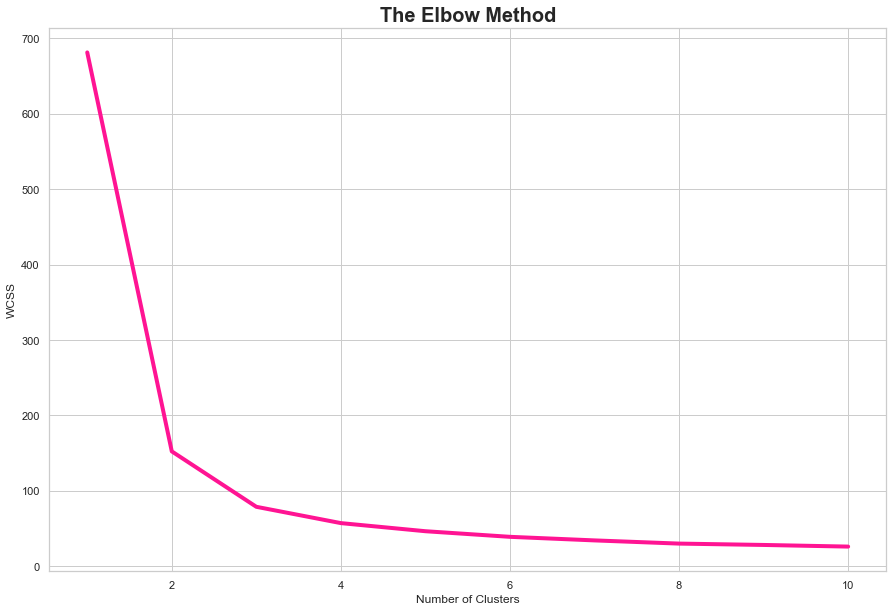

In [211]:
# Plotting the results to visualize 'the elbow'
fig = plt.figure(figsize=(15, 10))
sns.set(style='whitegrid',)
plt.plot(range(1, 11), wcss, linewidth='4', color='deeppink')
plt.title('The Elbow Method',fontweight ='bold', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
#RESULT: We can see that 'the elbow' is between 2 and 3. Therefore, the optimum number of clusters 
#should be between 2 and 3. Let us consider it as 3 and apply k-means to the dataset.

In [212]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

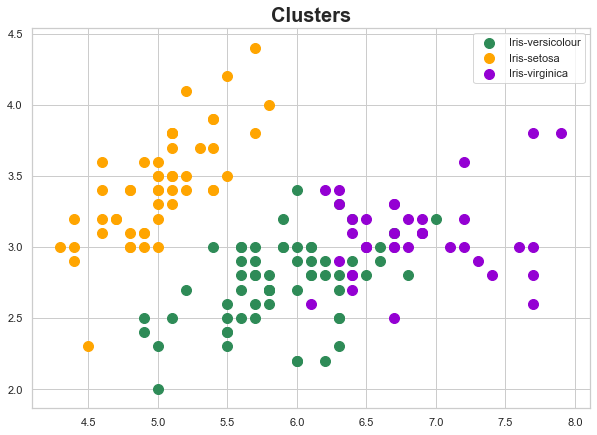

In [213]:
# Visualising the clusters
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters',fontweight ='bold', fontsize=20)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'darkviolet', label = 'Iris-virginica')
plt.legend()

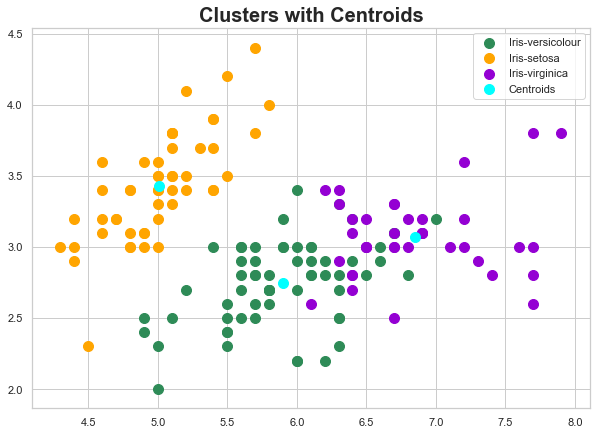

In [214]:
#visualizing the 3 clusters along with their centroids
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'darkviolet', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', 
            label = 'Centroids')
plt.legend()

#### **Conclusion:** For the given ‘Iris’ dataset, the optimum number of clusters is 3